## CHO

In [1]:
import csv
import numpy as np
import pandas as pd

with open('cho.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split('\t') for line in stripped if line)
    with open('test.csv', 'w') as out_file:
        writer = csv.writer(out_file)
#         writer.writerow(('title', 'intro'))
        writer.writerows(lines)
    
    

In [2]:
data = pd.read_csv("test.csv",header=None)

print(data)

      0   1      2      3      4      5      6      7      8     9      10  \
0      1   1 -0.690 -0.960 -1.160 -0.660 -0.550  0.120 -1.070 -1.22  0.820   
1      2   1 -0.210  0.190  0.860  0.040 -0.350 -0.390 -0.510 -0.20  0.000   
2      3   1 -0.300 -0.560 -0.290 -0.500 -0.270 -0.290 -0.560 -1.04  0.320   
3      4   1  0.070  0.260 -0.470 -0.680 -0.630 -0.390  0.070  0.79  0.580   
4      5   1 -1.040  0.130  0.510 -0.440 -0.880 -0.320  0.210  0.95  1.070   
5      6   1 -1.170  0.090 -0.520 -1.040 -1.160 -0.830  0.170  0.93  0.890   
6      7   1 -0.160  0.350 -0.130 -0.260 -0.400 -0.470  0.100  0.74  0.450   
7      8   1 -0.890  0.770 -0.250 -0.710 -0.330  0.050 -0.150 -0.42  0.680   
8      9   1 -0.180  0.140 -0.040 -0.760 -0.680 -0.530 -0.370  0.19  0.810   
9     10   1 -0.420 -0.570  0.080 -0.440 -0.360 -0.180 -0.150  0.56  0.630   
10    11   1 -0.150  0.320  0.230 -0.760 -1.160 -0.900 -0.230  0.28  0.450   
11    12   1 -1.180 -1.020 -1.740 -1.690 -0.820 -0.190 -0.310  0

In [3]:
# i=0
# while(i<len(data)):
#     if(data.iloc[i][1]==-1):
#         data.drop(data.index[i],inplace=True)
#         continue
#     else:
#         i=i+1
        
# print(data.shape)

In [4]:
import numpy as np
data_clean = np.zeros((data.shape[0],data.shape[1]-2))
for i in range(len(data)):
    for j in range(2,len(data.iloc[i])):
            data_clean[i][j-2] = data.iloc[i][j]
print(data_clean) 

[[-0.69  -0.96  -1.16  ... -0.04   0.19   0.82 ]
 [-0.21   0.19   0.86  ... -1.23  -0.325  0.   ]
 [-0.3   -0.56  -0.29  ... -0.12  -0.16   0.67 ]
 ...
 [-3.12  -4.12  -3.54  ...  1.48   2.06   2.36 ]
 [-0.79  -0.56  -0.79  ...  0.49   0.08   0.15 ]
 [-1.16  -1.39  -0.96  ...  0.493  1.27   0.87 ]]


In [8]:
print(data_clean.shape)

(386, 16)


In [9]:
import random

# c = dict()
# for j in range(5):
#     init_center= []
#     for i in range(data_clean.shape[1]):
#         init_center.append(round(random.uniform(-3.0, 3.0), 2))
#         c[j+1]=np.asarray(init_center)

# print(c)    

In [10]:
k=5
init_center=[]
# demo_center=[]
centroids = dict()
for i in range(k):
    init_center.append(random.randrange(0, data_clean.shape[0]))
#     init_center.append(demo_center[i])
    centroids[i+1] = data_clean[init_center[i]]
print(init_center) 


[147, 90, 24, 277, 203]


In [11]:
# centroids=pd.DataFrame(np.array([data_clean[init_center[0]],data_clean[init_center[1]]]))

# centroids = dict()
# for i in range(5):
#     centroids[i+1] = data_clean[init_center[i]]
print(centroids)

{1: array([-0.88 , -1.15 ,  1.09 ,  0.4  ,  0.44 ,  0.45 , -0.2  , -0.72 ,
       -0.71 ,  0.87 ,  0.86 ,  0.46 ,  0.103, -0.21 , -0.74 , -0.25 ]), 2: array([-0.31,  0.73,  2.04,  1.22,  0.34, -0.27, -0.7 , -1.7 , -0.54,
        1.04,  0.7 ,  0.79, -0.38, -1.11, -0.64, -0.88]), 3: array([-0.26 ,  0.24 ,  0.61 ,  0.34 ,  0.57 , -0.09 , -0.13 , -0.34 ,
       -0.46 ,  0.19 ,  0.026, -0.42 , -0.17 , -0.29 , -0.05 , -0.14 ]), 4: array([-0.79, -1.04, -0.49, -0.12,  0.61,  0.77,  0.34,  0.12,  0.12,
       -0.35,  0.15,  0.22,  0.37,  0.29,  0.17,  0.14]), 5: array([-0.89 , -0.31 ,  0.69 ,  0.87 ,  1.17 ,  0.79 , -0.29 , -0.58 ,
       -1.   ,  0.2  ,  0.69 ,  0.61 ,  0.344,  0.06 , -0.51 , -0.74 ])}


In [12]:
from operator import add 

def updateCentroid(cluslist,k):
    centroid=dict()
    for i in range(1,k+1):
        centroid[i] = [j for j, x in enumerate(cluslist) if x == i]
        
#     print(centroid) 
    for key, value in centroid.items():
        if(len(value)>0):
            res=[0]*data_clean.shape[1]
            for item in value:
                result = list(map(add, res, data_clean[item])) 
                res=result
            res[:] = [x / len(value) for x in res]    
            centroids[key] = res
#             print(res)  
    return centroids    
        
    
# centroids = updateCentroid(cluslist,5)  
# print(centroids)

In [13]:
def kmeans(k,flag,maxIter,centroids):
    while(True):
        cluslist=[]
        for i in range(data_clean.shape[0]):
            min = float("inf")
            for j in range(1,k+1):
                sum=0
                dist=0
                for m in range(len(data_clean[i])):
                    sum=sum+(data_clean[i][m]-centroids[j][m])**2
                dist = sum**0.5  
                if(dist<min):
                    min=dist
                    cluster = j
            cluslist.append(cluster) 
    #     print(cluslist)    
    #     print(prevcluslist)  
        maxIter -= 1
        if(maxIter == 0):
            return cluslist, centroids
        if(flag and (cluslist == prevcluslist)):
            return cluslist, centroids
        prevcluslist = cluslist.copy()  
        flag=True
        centroids = updateCentroid(cluslist,k)
    #     print(centroids)


cluslist, centroids = kmeans(5,False,100,centroids)

print(cluslist)   
print(centroids)
                
            

[3, 1, 3, 3, 4, 4, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 4, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 1, 1, 4, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 5, 2, 3, 1, 3, 3, 1, 1, 3, 3, 2, 1, 5, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 3, 3, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 1, 1, 2, 1, 2, 1, 3, 1, 1, 1, 5, 1, 5, 1, 5, 1, 1, 5, 4, 5, 1, 5, 2, 5, 5, 5, 1, 5, 3, 5, 1, 1, 1, 5, 5, 2, 5, 1, 2, 1, 1, 1, 1, 5, 5, 3, 5, 1, 3, 1, 5, 1, 1, 1, 2, 5, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 1, 5, 1, 5, 1, 2, 2, 1, 1, 5, 1, 5, 5, 4, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 5, 3, 3, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 4, 

In [14]:
gtcluslist = list(data.iloc[:,1])
print(gtcluslist)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 

In [15]:
P = np.zeros((len(gtcluslist),len(gtcluslist)))
C = np.zeros((len(cluslist),len(cluslist)))

for i in range(len(cluslist)):
    for j in range(i,len(cluslist)):
        if(i==j):
            C[i][j] = 1    
        elif(cluslist[i]==cluslist[j]):
            C[i][j] = 1
            C[j][i] = 1
            
for i in range(len(gtcluslist)):
    for j in range(i,len(gtcluslist)):
        if(i==j):
            P[i][j] = 1    
        elif(gtcluslist[i]==gtcluslist[j]):
            P[i][j] = 1
            P[j][i] = 1
          
        


In [17]:
MTP, MTN, MFP, MFN = 0,0,0,0

for i in range(len(P)):
    for j in range(len(P[0])):
        if(C[i][j]==1 and P[i][j]==1):
            MTP += 1
        elif(C[i][j]==0 and P[i][j]==0):
            MTN += 1
        elif(C[i][j]==1 and P[i][j]==0):
            MFP += 1
        elif(C[i][j]==0 and P[i][j]==1):
            MFN += 1
            
            
rand_index = (MTP+MTN)/(MTP+MTN+MFP+MFN)    

jaccard = (MTP)/(MTP+MFP+MFN)

print("Rand index: ",rand_index)
print("Jaccard index: ",jaccard)


        

Rand index:  0.782074686568767
Jaccard index:  0.33153538930291926


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[[ 6.45931752e-01  1.64191313e+00]
 [-1.03856991e+00  7.45562180e-01]
 [ 5.90024976e-02  1.15130876e+00]
 [ 1.14847720e+00  1.04521877e+00]
 [ 8.34489354e-01  6.38589913e-01]
 [ 1.96652019e+00  1.41703305e+00]
 [ 8.08381017e-01  5.43951408e-01]
 [ 5.74841119e-01  6.29050335e-01]
 [ 6.45399283e-01  1.37898299e+00]
 [ 1.08023033e+00  4.98381105e-01]
 [ 3.31443566e-01  1.87527076e+00]
 [ 2.52454989e+00  1.84977219e+00]
 [ 1.03607285e+00  1.99460928e+00]
 [ 1.06054031e+00  2.12653331e+00]
 [ 5.48000778e-01  2.34946938e+00]
 [ 9.71840684e-01  1.12595336e+00]
 [ 9.49442262e-01  6.42631440e-01]
 [ 4.83989093e-01  1.13814330e+00]
 [-4.03783898e-01  1.48710385e+00]
 [ 1.00131864e+00  9.39366243e-01]
 [-1.85183886e-02  1.81875854e+00]
 [ 1.04460962e+00  6.32390941e-01]
 [-1.99217039e-01  2.17829676e+00]
 [ 8.28545108e-01  1.12872066e+00]
 [-6.55914603e-01 -4.12716584e-01]
 [-1.00247145e+00  6.99211372e-01]
 [ 8.19213317e-01  1.18264203e+00]
 [-1.88713267e+00 -6.22416091e-01]
 [ 9.30153217e-02  1

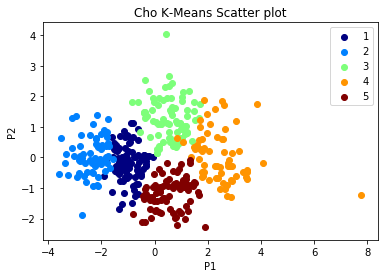

In [21]:
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_clean)
print(data_pca)



x = data_pca[:,0]
y = data_pca[:,1]
classes = np.unique(cluslist)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if cluslist[j] == u]
    yi = [y[j] for j  in range(len(x)) if cluslist[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('Cho K-Means Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')

# plt.show()
# fig = plt.figure()
plt.savefig('Cho K-Means Scatter plot.png')





'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

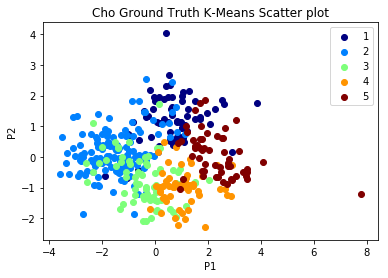

In [22]:
classes = np.unique(gtcluslist)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if gtcluslist[j] == u]
    yi = [y[j] for j  in range(len(x)) if gtcluslist[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('Cho Ground Truth K-Means Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')

# plt.show()
# fig = plt.figure()
plt.savefig('Cho Ground Truth K-Means Scatter plot.png')

## IYER

In [23]:
with open('iyer.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split('\t') for line in stripped if line)
    with open('test.csv', 'w') as out_file:
        writer = csv.writer(out_file)
#         writer.writerow(('title', 'intro'))
        writer.writerows(lines)
    
data = pd.read_csv("test.csv",header=None)

print(data)

# i=0
# while(i<len(data)):
#     if(data.iloc[i][1]==-1):
#         data.drop(data.index[i],inplace=True)
#         continue
#     else:
#         i=i+1
        
print(data.shape)


data_clean = np.zeros((data.shape[0],data.shape[1]-2))
for i in range(len(data)):
    for j in range(2,len(data.iloc[i])):
            data_clean[i][j-2] = data.iloc[i][j]
print(data_clean) 

print(data_clean.shape)

      0   1    2     3     4      5      6      7      8      9     10    11  \
0      1  -1  1.0  0.72  0.10   0.57   1.08   0.66   0.39   0.49  0.28  0.50   
1      2   1  1.0  1.58  1.05   1.15   1.22   0.54   0.73   0.82  0.82  0.90   
2      3   1  1.0  1.10  0.97   1.00   0.90   0.67   0.81   0.88  0.77  0.71   
3      4   1  1.0  0.97  1.00   0.85   0.84   0.72   0.66   0.68  0.47  0.61   
4      5   1  1.0  1.21  1.29   1.08   0.89   0.88   0.66   0.85  0.67  0.58   
5      6   1  1.0  1.45  1.44   1.12   1.10   1.15   0.79   0.77  0.78  0.71   
6      7   1  1.0  1.15  1.10   1.00   1.08   0.79   0.98   1.03  0.59  0.57   
7      8   1  1.0  1.32  1.35   1.13   1.00   0.91   1.22   1.05  0.58  0.57   
8      9   1  1.0  1.01  1.38   1.21   0.79   0.85   0.78   0.73  0.64  0.58   
9     10   1  1.0  0.85  1.03   1.00   0.81   0.82   0.73   0.51  0.24  0.54   
10    11   1  1.0  1.12  0.92   1.01   0.86   0.86   0.70   0.62  0.36  0.37   
11    12   1  1.0  1.23  1.21   0.95   0

In [24]:
k=10
init_center=[]
# demo_center=[]
centroids = dict()
for i in range(k):
    init_center.append(random.randrange(0, data_clean.shape[0]))
#     init_center.append(demo_center[i])
    centroids[i+1] = data_clean[init_center[i]]
print(init_center) 
print(centroids)

[34, 224, 475, 388, 113, 220, 484, 154, 195, 452]
{1: array([1.  , 1.04, 1.01, 0.81, 0.95, 0.63, 0.69, 0.62, 0.49, 0.99, 0.98,
       0.83]), 2: array([1.  , 1.25, 1.09, 1.05, 1.32, 0.88, 0.73, 0.7 , 0.63, 1.05, 1.31,
       1.58]), 3: array([1.  , 1.26, 2.57, 1.52, 0.98, 1.18, 1.7 , 2.56, 3.24, 1.38, 1.43,
       1.07]), 4: array([1.  , 1.2 , 1.25, 1.11, 1.64, 4.33, 4.53, 2.9 , 2.13, 2.  , 1.69,
       1.64]), 5: array([1.  , 0.7 , 0.52, 0.7 , 1.01, 0.46, 0.39, 0.59, 0.59, 0.73, 0.74,
       0.69]), 6: array([1.  , 1.07, 1.72, 1.21, 0.77, 0.87, 0.91, 0.6 , 0.94, 1.08, 0.99,
       1.06]), 7: array([1.  , 1.08, 0.92, 1.53, 1.91, 3.25, 2.36, 1.77, 1.72, 2.16, 1.77,
       1.84]), 8: array([1.  , 0.69, 0.64, 0.54, 0.73, 0.5 , 0.46, 0.24, 0.26, 0.84, 0.69,
       0.63]), 9: array([1.  , 0.9 , 0.91, 0.95, 0.86, 0.62, 0.52, 0.43, 0.38, 0.94, 1.23,
       1.13]), 10: array([1.  , 0.95, 0.71, 0.97, 1.21, 2.09, 1.98, 2.33, 2.08, 1.78, 2.1 ,
       2.37])}


In [25]:
cluslist, centroids = kmeans(k,False,100,centroids)


print(cluslist)   
print(centroids)
                
            

[5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 8, 5, 5, 5, 5, 8, 5, 5, 8, 8, 8, 5, 5, 5, 5, 5, 5, 5, 8, 5, 5, 8, 8, 5, 8, 5, 5, 5, 5, 8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8, 8, 5, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 8, 5, 8, 8, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 5, 5, 8, 5, 8, 8, 5, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 8, 8, 8, 5, 8, 8, 8, 9, 2, 5, 5, 5, 5, 5, 9, 9, 5, 2, 9, 9, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 2, 2, 2, 2, 2, 2, 9, 2, 2, 2, 

In [26]:
gtcluslist = list(data.iloc[:,1])
# print(gtcluslist)

P = np.zeros((len(gtcluslist),len(gtcluslist)))
C = np.zeros((len(cluslist),len(cluslist)))

for i in range(len(cluslist)):
    for j in range(i,len(cluslist)):
        if(i==j):
            C[i][j] = 1    
        elif(cluslist[i]==cluslist[j]):
            C[i][j] = 1
            C[j][i] = 1
            
for i in range(len(gtcluslist)):
    for j in range(i,len(gtcluslist)):
        if(i==j):
            P[i][j] = 1    
        elif(gtcluslist[i]==gtcluslist[j]):
            P[i][j] = 1
            P[j][i] = 1
          
        
MTP, MTN, MFP, MFN = 0,0,0,0

for i in range(len(P)):
    for j in range(len(P[0])):
        if(C[i][j]==1 and P[i][j]==1):
            MTP += 1
        elif(C[i][j]==0 and P[i][j]==0):
            MTN += 1
        elif(C[i][j]==1 and P[i][j]==0):
            MFP += 1
        elif(C[i][j]==0 and P[i][j]==1):
            MFN += 1
            
            
rand_index = (MTP+MTN)/(MTP+MTN+MFP+MFN)    

jaccard = (MTP)/(MTP+MFP+MFN)

print("Rand index: ",rand_index)
print("Jaccard index: ",jaccard)


        

Rand index:  0.8298545768812035
Jaccard index:  0.39339211161649174


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[[-2.2045084   1.20243126]
 [-1.55287224  0.73850778]
 [-1.54689273  1.08299221]
 ...
 [ 4.36826438 -1.34298402]
 [ 4.92751914 -0.81675341]
 [ 5.75114484  0.09822077]]


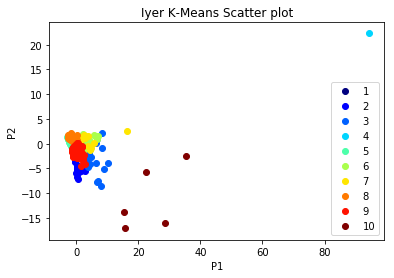

In [27]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_clean)
print(data_pca)



x = data_pca[:,0]
y = data_pca[:,1]
classes = np.unique(cluslist)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if cluslist[j] == u]
    yi = [y[j] for j  in range(len(x)) if cluslist[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('Iyer K-Means Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')

# plt.show()
# fig = plt.figure()
plt.savefig('Iyer K-Means Scatter plot.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

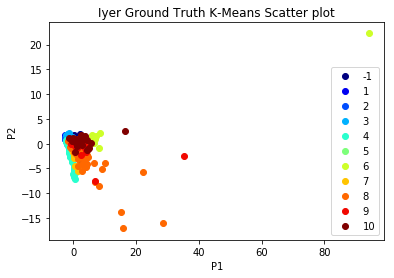

In [28]:
classes = np.unique(gtcluslist)
colors = [plt.cm.jet(i/float(len(classes)-1)) for i in range(len(classes))]
for i, u in enumerate(classes):
    xi = [x[j] for j  in range(len(x)) if gtcluslist[j] == u]
    yi = [y[j] for j  in range(len(x)) if gtcluslist[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()
plt.title('Iyer Ground Truth K-Means Scatter plot')
plt.xlabel('P1')
plt.ylabel('P2')

# plt.show()
# fig = plt.figure()
plt.savefig('Iyer Ground Truth K-Means Scatter plot.png')